<a href="https://colab.research.google.com/github/LerinaMM/analise_exploratoria_2_acidentes_ambientais_ibama/blob/main/acidentes_ambientais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIEMA - COMUNICADO DE ACIDENTES AMBIENTAIS**

## Este banco de dados foi retirado através do portal www.dados.gov.br do governo federal

Comunicações de acidentes ambientais registradas no Sistema Nacional de Emergências Ambientais (Siema), instituído pela Instrução Normativa nº 15, de 6 de outubro de 2014.

O Siema constitui ferramenta informatizada de comunicação de acidentes ambientais, visualização de mapas interativos e geração de dados estatísticos dos acidentes ambientais registrados pelo Ibama.

Informações Adicionais
Campo	Valor
Fonte	http://siscom.ibama.gov.br
Autor	Coordenação-Geral de Emergências Ambientais (CGEMA)
Mantenedor	Coordenação-Geral de Emergências Ambientais (CGEMA)
Última Atualização	18 de Outubro de 2021, 20:37 (UTC-03:00)
Criado	26 de Fevereiro de 2019, 16:46 (UTC-03:00)
Categorias no VCGE	Meio Ambiente, Preservação e Conservação Ambiental.
Cobertura geográfica	Território nacional.
Cobertura temporal	Início em 26/04/200; em atividade.
Frequência de atualização	Diária.
Granularidade geográfica	Par de coordenadas geográficas de referência.
Granularidade temporal	Data e hora da ocorrência e do registro do acidente.
Metodologia	Formulário próprio e de preenchimento on-line, o qual será enviado eletronicamente pelo Siema.

Link do banco de dados referente a esse repositório

https://dados.gov.br/dataset/comunicacao-de-acidentes-ambientais


# Conteúdo dos Dados

Foram destacados em negrito as siglas que tinham registros no banco de dados.

- **FID** - Registra o número do acidente
- **id_ocorrencia** - numero sequencial do registro do acidente 
- **id_municipio **- código do município
- **id_uf** - código da unidade da federação
- **id_responsavel** - código do responsável
- des_complemento_tipo_localizaca
- des_complemento_tipo_evento
- des_complemento_instituicao_atu
- des_complemento_tipo_dano_ident
- des_danos
- **des_ocorrencia** - Descrição do tipo de Ocorrência
- dt_ocorrencia
- hr_ocorrencia
- **dt_registro** - Data do registro do acidente
- des_informacoes_adicionais
- plano_emergencia
- plano_emergencia_acionado
- iniciados_outras_providencias
- des_outras_providencias
- ocorrencia_oleo
- dt_primeira_obs
- hr_primeira_obs
- informacao_geografica
- informacao_responsavel
- acao_inicial_tomada
- des_causa_provavel
- situacao_atual_descarga
- nome_comunicante
- telefone_contato
- des_obs
- email_comunicante
- nro_ocorrencia
- endereco_ocorrencia
- nome_instituicao_atuando
- telefone_instituicao_atuando
- tipo_substancia
- volume_estimado
- produto_nao_se_aplica
- produto_perigoso
- produto_nao_especificado
- id_bacia_sedimentar
- cpf_contato
- ip_contato
- legado
- des_instituicao_empresa
- des_funcao_comunicante
- validado - Resposta Sim ou não
- tipo_comunicado
- **periodo_ocorrencia** - Período do dia em que houve a Ocorrência - M - Manha, T Tarde e N - Noite
- periodo_primeira_obs
- **municipio** - Municipio em que ocorreu o acidente
- **uf **- Estado na qual o acidente ocorreu
- bacia_sedimentar
- **origem - Tipo de local onde ocorreu este tipo de acidente**
- tipo_evento
- dt_ocorrencia_feriado
- dia_semana
- dia_semana_primeira_obs
- dia_semana_registro
- **institiuicoes_atuando_local** - Instituições que atuaram no local
- tipos_fontes_informacoes
- **tipos_danos_identificados **- Relata quais foram os tipos de óbitos verificados
- produtos_onu
- produtos_outro
- geom
- dt_carga
- feicao_proxima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", font_scale=1.75)

train_acidentes_df = pd.read_csv("train_acidentes.csv")

> Podemos visualizar as primeiras linhas do DataFrame (DF) com o metodo head()


In [ ]:
train_acidentes_df.head(5)

,FID,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_complemento_tipo_localizaca,des_complemento_tipo_evento,des_complemento_instituicao_atu,des_complemento_tipo_dano_ident,des_danos,des_ocorrencia,dt_ocorrencia,hr_ocorrencia,dt_registro,des_informacoes_adicionais,plano_emergencia,plano_emergencia_acionado,iniciados_outras_providencias,des_outras_providencias,ocorrencia_oleo,dt_primeira_obs,hr_primeira_obs,informacao_geografica,informacao_responsavel,acao_inicial_tomada,des_causa_provavel,situacao_atual_descarga,nome_comunicante,telefone_contato,des_obs,email_comunicante,nro_ocorrencia,endereco_ocorrencia,nome_instituicao_atuando,telefone_instituicao_atuando,tipo_substancia,volume_estimado,produto_nao_se_aplica,produto_perigoso,produto_nao_especificado,id_bacia_sedimentar,cpf_contato,ip_contato,legado,des_instituicao_empresa,des_funcao_comunicante,validado,tipo_comunicado,periodo_ocorrencia,periodo_primeira_obs,municipio,uf,bacia_sedimentar,origem,tipo_evento,dt_ocorrencia_feriado,dia_semana,dia_semana_primeira_obs,dia_semana_registro,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,produtos_onu,produtos_outro,geom,dt_carga,feicao_proxima
0,adm_comunicacidente_p.355c599e-3cd8-44db-a0d4-...,312,2706901.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Tombamento de caminhão carregado de biocombust...,NaN,NULL,2008-01-01 00:00:00,NaN,NaN,N,N,NaN,N,NaN,NaN,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,S,NaN,M,NaN,Pilar,AL,NaN,Rodovia,Outro(s),NaN,NaN,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Mídia,Óbitos/feridos,NaN,NaN,POINT (-35.9511275 -9.6016711),2021-12-21T20:43:57,NaN
1,adm_comunicacidente_p.fc456243-37df-4c85-aeb9-...,313,3205309.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Explosão em depósito de gás.,NaN,00:00,2008-01-01 00:00:00,NaN,NaN,N,N,NaN,N,NaN,NaN,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,S,NaN,M,NaN,Vitória,ES,NaN,Armazenamento/depósito,Outro(s),NaN,NaN,NaN,NaN,Corpo de Bombeiros,Mídia,Outro(s),NaN,NaN,POINT (-40.3016327 -20.2996826),2021-12-21T20:43:57,NaN
2,adm_comunicacidente_p.a850a9d0-55fa-4773-877c-...,314,5003702.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,Vazamento de esgoto em grande quantidade causa...,NaN,NULL,2009-01-01 00:00:00,NaN,NaN,N,N,NaN,N,NaN,NaN,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,S,NaN,M,NaN,Dourados,MS,NaN,Outro(s),Outro(s),NaN,NaN,NaN,NaN,Outra(s),Mídia,Fauna;Flora;População afetada/evacuada;Rio/cór...,NaN,NaN,POINT (-54.812208 -22.2206145),2021-12-21T20:43:57,NaN
3,adm_comunicacidente_p.cc7f5439-99f4-4129-bf81-...,315,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Tombamento de caminhão carregado de combustíve...,NaN,NULL,2009-01-01 00:00:00,NaN,NaN,N,N,NaN,N,NaN,NaN,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,S,NaN,M,NaN,NaN,DF,NaN,Rodovia,Outro(s),NaN,NaN,NaN,NaN,Corpo de Bombeiros;Defesa Civil,Mídia,Solo,NaN,NaN,POINT (-47.9768478 -15.82326),2021-12-21T20:43:57,NaN
4,adm_comunicacidente_p.019828c3-b4b0-4b47-a1e3-...,316,4312054.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,300 Kg de produtos poluidores encontrados ás m...,NaN,NULL,2009-01-01 00:00:00,NaN,NaN,N,N,NaN,N,NaN,NaN,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,S,NaN,M,NaN,Marques de Souza,RS,NaN,Outro(s),Outro(s),NaN,NaN,NaN,NaN,Outra(s),Mídia,Rio/córrego;Solo,NaN,NaN,POINT (-52.097268 -29.331113),2021-12-21T20:43:57,NaN


In [ ]:
#Trará os dados com uma apresentação diferente
#Dtype na terceira coluna informa qual é o tipo de dado

train_acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              12217 non-null  object 
 1   id_ocorrencia                    12217 non-null  int64  
 2   id_municipio                     10017 non-null  float64
 3   id_uf                            11674 non-null  float64
 4   id_responsavel                   5626 non-null   float64
 5   des_complemento_tipo_localizaca  3304 non-null   object 
 6   des_complemento_tipo_evento      3098 non-null   object 
 7   des_complemento_instituicao_atu  4139 non-null   object 
 8   des_complemento_tipo_dano_ident  2909 non-null   object 
 9   des_danos                        0 non-null      float64
 10  des_ocorrencia                   5775 non-null   object 
 11  dt_ocorrencia                    6151 non-null   object 
 12  hr_ocorrencia     

> **Faremos uma operação para trazer o nome das colunas na ordem que estão dispostas no banco de Dados**

In [ ]:
train_acidentes_df.columns

Index(['FID', 'id_ocorrencia', 'id_municipio', 'id_uf', 'id_responsavel',
       'des_complemento_tipo_localizaca', 'des_complemento_tipo_evento',
       'des_complemento_instituicao_atu', 'des_complemento_tipo_dano_ident',
       'des_danos', 'des_ocorrencia', 'dt_ocorrencia', 'hr_ocorrencia',
       'dt_registro', 'des_informacoes_adicionais', 'plano_emergencia',
       'plano_emergencia_acionado', 'iniciados_outras_providencias',
       'des_outras_providencias', 'ocorrencia_oleo', 'dt_primeira_obs',
       'hr_primeira_obs', 'informacao_geografica', 'informacao_responsavel',
       'acao_inicial_tomada', 'des_causa_provavel', 'situacao_atual_descarga',
       'nome_comunicante', 'telefone_contato', 'des_obs', 'email_comunicante',
       'nro_ocorrencia', 'endereco_ocorrencia', 'nome_instituicao_atuando',
       'telefone_instituicao_atuando', 'tipo_substancia', 'volume_estimado',
       'produto_nao_se_aplica', 'produto_perigoso', 'produto_nao_especificado',
       'id_bacia_sedime

> **O método shape mostra o tamanho dos nossos dados (dimensões dos eixos)**

In [ ]:
train_acidentes_df.shape

(12217, 67)

Temos 12217 linhas preenchidas e 67 colunas

> **Faremos uma verificação se temos dados duplicados em nosso banco de dados**

In [ ]:
train_df.duplicated().sum()

0

Nessa operação mostra que não temos dados duplicados em nosso banco de dados

>** Mostraremos as Estatísticas resumidas do nosso banco de dados de acidentes ambientais**

In [ ]:
train_acidentes_df.describe()

,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_danos,des_informacoes_adicionais,acao_inicial_tomada,nro_ocorrencia,volume_estimado,id_bacia_sedimentar,dia_semana,dia_semana_primeira_obs,dia_semana_registro,feicao_proxima
count,12217.000000,1.001700e+04,11674.000000,5626.000000,0.0,0.0,0.0,1.221700e+04,1.429000e+03,1863.000000,0.0,0.0,0.0,0.0
mean,7400.386265,3.330574e+06,16.596025,6702.268397,NaN,NaN,NaN,2.667367e+11,2.801371e+04,14.978529,NaN,NaN,NaN,NaN
std,4130.081588,8.579101e+05,6.424601,1899.424635,NaN,NaN,NaN,5.894845e+11,1.058141e+06,1.874291,NaN,NaN,NaN,NaN
min,312.000000,0.000000e+00,0.000000,3270.000000,NaN,NaN,NaN,1.000000e+02,0.000000e+00,4.000000,NaN,NaN,NaN,NaN
25%,3862.000000,3.113909e+06,13.000000,5183.500000,NaN,NaN,NaN,1.410000e+03,5.000000e-04,15.000000,NaN,NaN,NaN,NaN
50%,7337.000000,3.300100e+06,16.000000,6791.500000,NaN,NaN,NaN,2.017543e+10,8.000000e-03,15.000000,NaN,NaN,NaN,NaN
75%,11068.000000,3.550308e+06,24.000000,8291.750000,NaN,NaN,NaN,2.019131e+11,1.140000e-01,16.000000,NaN,NaN,NaN,NaN
max,14414.000000,5.300108e+06,27.000000,9905.000000,NaN,NaN,NaN,2.021122e+12,4.000000e+07,17.000000,NaN,NaN,NaN,NaN


> **Analisaremos as colunas que possuem dados faltantes**

In [ ]:
train_acidentes_df.isnull().sum().sort_values(ascending=False)

feicao_proxima                12217
dia_semana                    12217
des_danos                     12217
des_informacoes_adicionais    12217
acao_inicial_tomada           12217
                              ...  
dt_carga                          0
ocorrencia_oleo                   0
nro_ocorrencia                    0
id_ocorrencia                     0
FID                               0
Length: 67, dtype: int64

As colunas que possuem dados faltantes que poderiam ser excluídas a fim de facilitar a análise do banco são: 

- dt_carga
- ocorrencia_oleo
- nro_ocorrencia
- FID

> **Verificação de colunas com os valores nulos**

In [ ]:
train_acidentes_df.isnull().sum()

FID                   0
id_ocorrencia         0
id_municipio       2200
id_uf               543
id_responsavel     6591
                  ...  
produtos_onu       9616
produtos_outro     9383
geom                  0
dt_carga              0
feicao_proxima    12217
Length: 67, dtype: int64

As colunas com valores nulos são: 
- id_municipio
- id_uf
- id_responsável
- produtos_onu
- produtos_outro 
- feicao_proxima

> **Vamos descobrir a porcentagem dos valores faltantes em cada coluna**

In [ ]:
(train_acidentes_df.isnull().sum() / len(train_acidentes_df)) * 100.0

FID                            0.000000
id_ocorrencia                  0.000000
id_municipio                  18.007694
id_uf                          4.444626
id_responsavel                53.949415
                                ...    
tipos_danos_identificados      7.211263
produtos_outro                76.802816
geom                           0.000000
dt_carga                       0.000000
feicao_proxima               100.000000
Length: 66, dtype: float64

Podemos verificar a partir dessa análise, o banco de dados mostra que 78% da coluna chamada produtos_onu, 76% da coluna chamada produtos_outro e 100% dos dados chamados feicao_proxima não aparecem as informações, vamos dessa forma, descartar essas colunas

> **Vamos descartar a coluna chamada "produtos_onu"**

In [ ]:
train_acidentes_df.drop('produtos_onu', axis='columns', inplace=True)
train_acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              12217 non-null  object 
 1   id_ocorrencia                    12217 non-null  int64  
 2   id_municipio                     10017 non-null  float64
 3   id_uf                            11674 non-null  float64
 4   id_responsavel                   5626 non-null   float64
 5   des_complemento_tipo_localizaca  3304 non-null   object 
 6   des_complemento_tipo_evento      3098 non-null   object 
 7   des_complemento_instituicao_atu  4139 non-null   object 
 8   des_complemento_tipo_dano_ident  2909 non-null   object 
 9   des_danos                        0 non-null      float64
 10  des_ocorrencia                   5775 non-null   object 
 11  dt_ocorrencia                    6151 non-null   object 
 12  hr_ocorrencia     

> **Vamos descartar a coluna chamada "feicao_proxima"**

In [ ]:
train_acidentes_df.drop('feicao_proxima', axis='columns', inplace=True)
train_acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              12217 non-null  object 
 1   id_ocorrencia                    12217 non-null  int64  
 2   id_municipio                     10017 non-null  float64
 3   id_uf                            11674 non-null  float64
 4   id_responsavel                   5626 non-null   float64
 5   des_complemento_tipo_localizaca  3304 non-null   object 
 6   des_complemento_tipo_evento      3098 non-null   object 
 7   des_complemento_instituicao_atu  4139 non-null   object 
 8   des_complemento_tipo_dano_ident  2909 non-null   object 
 9   des_danos                        0 non-null      float64
 10  des_ocorrencia                   5775 non-null   object 
 11  dt_ocorrencia                    6151 non-null   object 
 12  hr_ocorrencia     

>**Vamos descartar a coluna chamada "produtos_outro"**

In [ ]:
train_acidentes_df.drop('produtos_outro', axis='columns', inplace=True)
train_acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              12217 non-null  object 
 1   id_ocorrencia                    12217 non-null  int64  
 2   id_municipio                     10017 non-null  float64
 3   id_uf                            11674 non-null  float64
 4   id_responsavel                   5626 non-null   float64
 5   des_complemento_tipo_localizaca  3304 non-null   object 
 6   des_complemento_tipo_evento      3098 non-null   object 
 7   des_complemento_instituicao_atu  4139 non-null   object 
 8   des_complemento_tipo_dano_ident  2909 non-null   object 
 9   des_danos                        0 non-null      float64
 10  des_ocorrencia                   5775 non-null   object 
 11  dt_ocorrencia                    6151 non-null   object 
 12  hr_ocorrencia     

> **Vamos descartar a coluna chamada "id_responsavel"**

In [ ]:
train_acidentes_df.drop('id_responsavel', axis='columns', inplace=True)
train_acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              12217 non-null  object 
 1   id_ocorrencia                    12217 non-null  int64  
 2   id_municipio                     10017 non-null  float64
 3   id_uf                            11674 non-null  float64
 4   des_complemento_tipo_localizaca  3304 non-null   object 
 5   des_complemento_tipo_evento      3098 non-null   object 
 6   des_complemento_instituicao_atu  4139 non-null   object 
 7   des_complemento_tipo_dano_ident  2909 non-null   object 
 8   des_danos                        0 non-null      float64
 9   des_ocorrencia                   5775 non-null   object 
 10  dt_ocorrencia                    6151 non-null   object 
 11  hr_ocorrencia                    11703 non-null  object 
 12  dt_registro       

> **Descartando poucos dados faltantes das colunas "id_uf" e "tipos_danos_identificados" "instituicoes_atuando_local" "tipos_fontes_informacoes"**

In [ ]:
train_acidentes_df.dropna(subset=['tipos_danos_identificados'], inplace=True)
(train_acidentes_df.isnull().sum() / len(train_acidentes_df)) * 100

FID                             0.000000
id_ocorrencia                   0.000000
id_municipio                   18.666196
id_uf                           4.384263
id_responsavel                 57.136556
                                 ...    
institiuicoes_atuando_local    10.735709
tipos_fontes_informacoes        2.002470
tipos_danos_identificados       0.000000
geom                            0.000000
dt_carga                        0.000000
Length: 64, dtype: float64

In [ ]:
train_acidentes_df.dropna(subset=['tipos_fontes_informacoes'], inplace=True)
(train_acidentes_df.isnull().sum() / len(train_acidentes_df)) * 100

FID                             0.000000
id_ocorrencia                   0.000000
id_municipio                   18.507516
id_uf                           4.185795
id_responsavel                 58.052030
                                 ...    
institiuicoes_atuando_local    10.387974
tipos_fontes_informacoes        0.000000
tipos_danos_identificados       0.000000
geom                            0.000000
dt_carga                        0.000000
Length: 64, dtype: float64

In [ ]:
#Agora vamos descartar as colunas "des_complemento_tipo_localizaca"

train_acidentes_df.drop('des_complemento_tipo_localizaca', axis='columns', inplace=True)
train_acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11109 entries, 0 to 12216
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              11109 non-null  object 
 1   id_ocorrencia                    11109 non-null  int64  
 2   id_municipio                     9053 non-null   float64
 3   id_uf                            10644 non-null  float64
 4   id_responsavel                   4660 non-null   float64
 5   des_complemento_tipo_evento      2544 non-null   object 
 6   des_complemento_instituicao_atu  3489 non-null   object 
 7   des_complemento_tipo_dano_ident  2809 non-null   object 
 8   des_danos                        0 non-null      float64
 9   des_ocorrencia                   5775 non-null   object 
 10  dt_ocorrencia                    5202 non-null   object 
 11  hr_ocorrencia                    10758 non-null  object 
 12  dt_registro       

# **Análise Exploratória dos Dados**

<Figure size 1296x720 with 0 Axes>

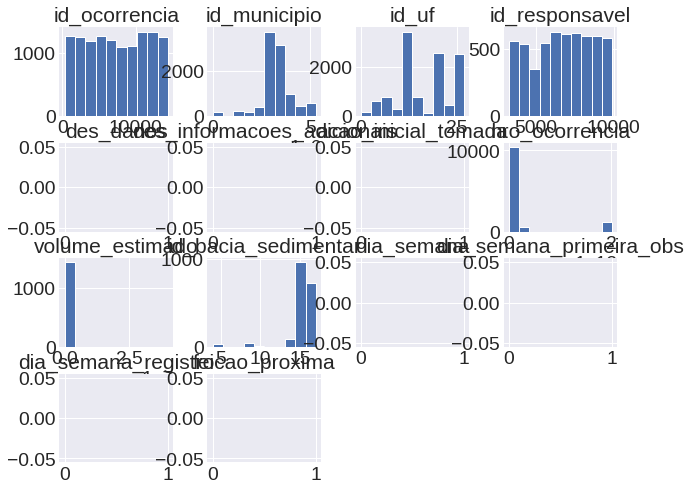

In [2]:
#ver histograma das variáveis numéricas

#Titulo do grafico

# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

train_acidentes_df.hist(figsize=(10,8));

In [ ]:
#Número de acidentes por estado

train_acidentes_df.groupby('uf')['uf'].count()

uf
AC       6
AL     111
AM     124
AP      12
BA     417
CE     153
DF     153
ES     385
GO     156
MA     109
MG    2687
MS     205
MT     124
PA      97
PB      46
PE      87
PI      33
PR     535
RJ    1833
RN     112
RO      48
RR       7
RS     448
SC     376
SE     192
SP    2108
TO      52
Name: uf, dtype: int64

Os estados onde mais ocorreram acidentes ambientais foram os estados de Minas Gerais e São Paulo.

In [ ]:
train_acidentes_df[u'origem'].value_counts()

Rodovia                                                    3965
Outro(s)                                                   2056
Plataforma                                                 1741
Ferrovia                                                   1075
Indústria                                                   805
Embarcação                                                  792
Duto                                                        702
Terminal/portos/ancoradouros/etc                            270
Armazenamento/depósito                                      207
Barragem                                                    139
Posto de combustível                                        133
Embarcação;Terminal/portos/ancoradouros/etc                  66
Refinaria                                                    40
Embarcação;Plataforma                                        27
Embarcação;Outro(s)                                           9
Outro(s);Rodovia                        

> **Identificando os estados com maior numero de acidentes ambientais do Brasil**

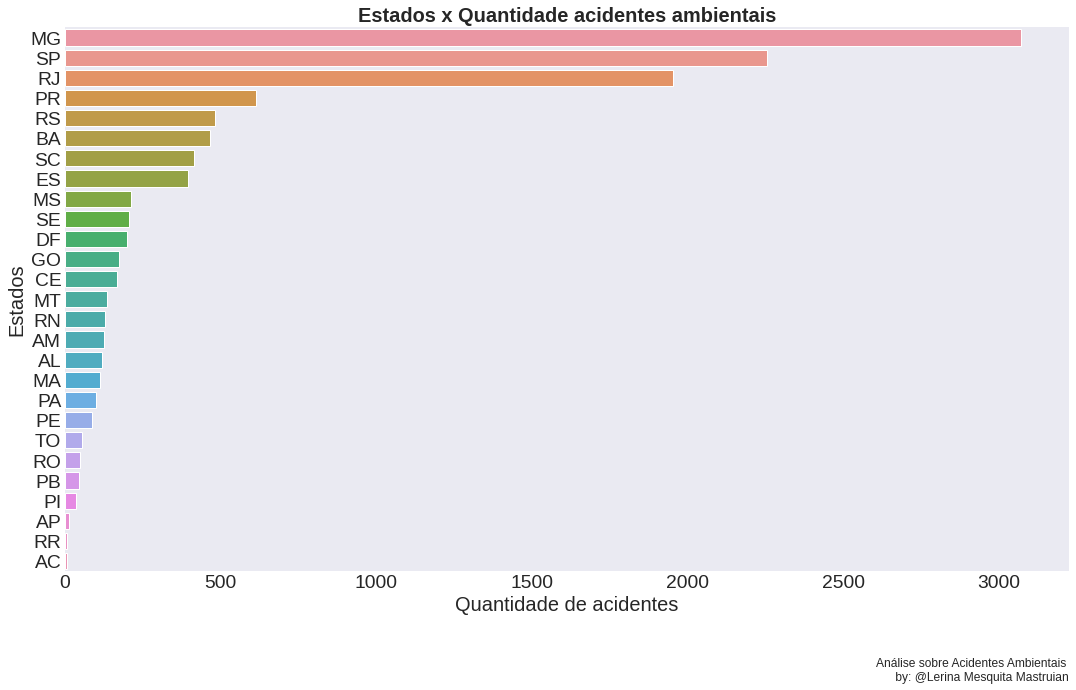

In [23]:
# Identificando os estados com maior número de acidentes de 2000 a 2021

# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

x = train_acidentes_df['uf'].value_counts().values
y = train_acidentes_df['uf'].value_counts().index
plt.title('Estados x Quantidade acidentes ambientais', fontsize=20, fontweight='bold')
sns.barplot( x=x, y=y ) 
plt.xlabel('Quantidade de acidentes', fontsize=20)
plt.ylabel('Estados', fontsize=20)

plt.annotate(
    'Análise sobre Acidentes Ambientais \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.20), xycoords='axes fraction', ha='right', fontsize=12);

plt.show()

Os estados que mais ocorreram acidentes de 2000 até Out 2021 são respectivamente Minas Gerais, São Paulo e Rio de Janeiro

> **Vamos analisar os locais onde mais ocorreram acidentes ambientais.**

<Figure size 1296x720 with 0 Axes>

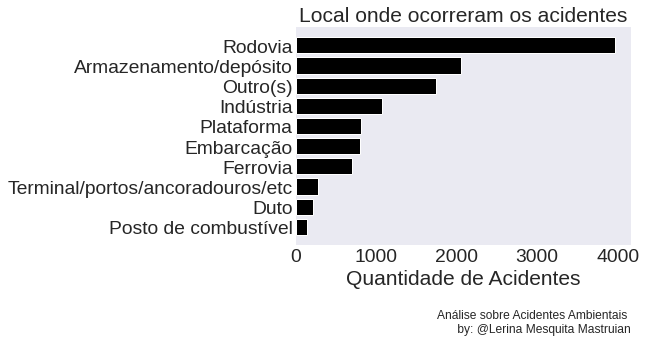

In [29]:
# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

fig, ax = plt.subplots()

y_pos = np.arange(len(train_acidentes_df['origem'].value_counts()[:10]))
values = train_acidentes_df['origem'].value_counts()[:10]
local = train_acidentes_df['origem'].unique()[:10]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(local)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Acidentes')
ax.set_title('Local onde ocorreram os acidentes')

plt.annotate(
    'Análise sobre Acidentes Ambientais \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.4), xycoords='axes fraction', ha='right', fontsize=12);

plt.show()

<Figure size 1296x720 with 0 Axes>

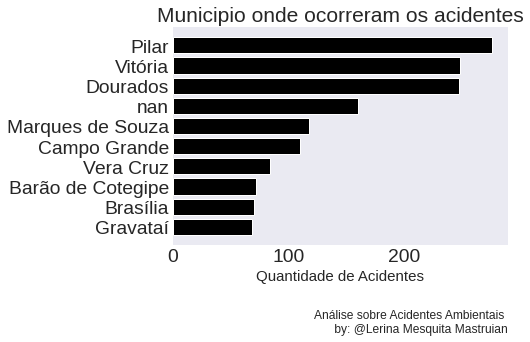

In [28]:
# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

fig, ax = plt.subplots()

y_pos = np.arange(len(train_acidentes_df['municipio'].value_counts()[:10]))
values = train_acidentes_df['municipio'].value_counts()[:10]
local = train_acidentes_df['municipio'].unique()[:10]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(local)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Acidentes', size = 15)
ax.set_title('Municipio onde ocorreram os acidentes')

plt.annotate(
    'Análise sobre Acidentes Ambientais \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.4), xycoords='axes fraction', ha='right', fontsize=12);

In [16]:
# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

plt.bar( train_acidentes_df['periodo_ocorrencia'][0:10] )

TypeError: ignored

<Figure size 1296x720 with 0 Axes>